# Grouping data

In many datasets, data can be categorized and we would wish to give descriptive statistics separately for each category.

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas 
import seaborn as sns
sns.set_theme()

### Load and view the data

<img src="images/carsBanner.png" width=100% alt="Picture of some cars" >

Let's load the datafile "vehicles.csv" which contains size data on vehicles parked at a vehicle-ferry terminal at 1pm on Sunday 24th April 2022, which they regard as a representative sample.

In [2]:
vehicles = pandas.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourse/main/data/vehicles.csv')
display(vehicles)

,length,height,width,type
0,3.9187,1.5320,1.8030,car
1,4.6486,1.5936,1.6463,car
2,3.5785,1.5447,1.7140,car
3,3.5563,1.5549,1.7331,car
4,4.0321,1.5069,1.7320,car
...,...,...,...,...
1359,15.5000,4.2065,2.5112,truck
1360,14.4960,4.1965,2.5166,truck
1361,15.9890,4.1964,2.4757,truck
1362,14.3700,4.2009,2.5047,truck


That was a long list of vehicles!

* What information do we have about each vehicle?

### Obtain descriptive statistics

We can use the built in functions in <tt>pandas.describe()</tt> to return descriptives for our data

In [3]:
vehicles['length'].describe()

count    1364.000000
mean        6.722972
std         4.232075
min         3.110900
25%         3.929450
50%         4.419300
75%         9.260325
max        16.231000
Name: length, dtype: float64

### Why group the data?

You can see above that the mean length of vehicles in the car park is 6.72m.

This is surprising as it is rather longer than even a large family car

To get a better sense of the length data, I am going to plot them. 

Don't worry too much about the plotting code for now, as there are dedicated exercises on plotting later.

Text(0.5, 0, 'vehicle length (m)')

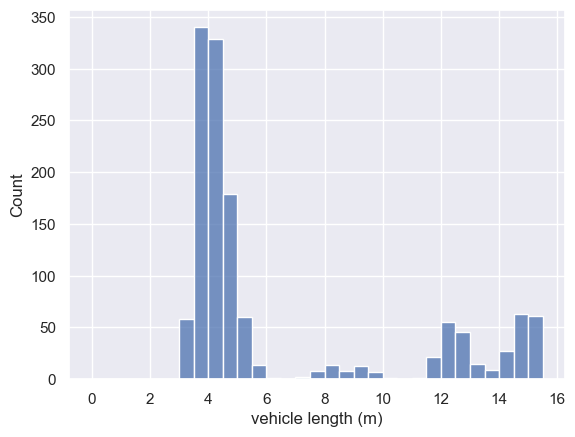

In [4]:
sns.histplot(data=vehicles, x="length",  bins = np.arange(0,16,0.5))
plt.xlabel('vehicle length (m)')

Interesting. It looks like there are several clusters of vehicle lengths. 

Have a look back at our dataframe - is there some information there that could explain the different clusters?
<ul>
    <li> Probably the clusters relate to different vehicle types
</ul>

I can plot vehicle types in different colours (again no need ot worry about the plotting code at this stage)

Text(0.5, 0, 'vehicle length (m)')

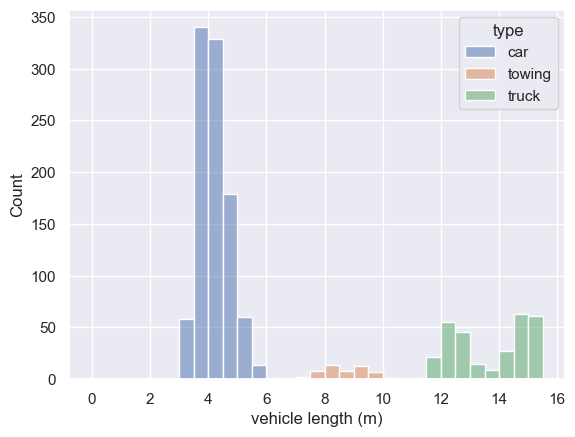

In [5]:
sns.histplot(data=vehicles, x="length", bins = np.arange(0,16,0.5), hue="type")
plt.xlabel('vehicle length (m)')

Aha. We might want to describe our data separately for each by vehicle type.

### Grouping into separate dataframes

One way to do this is to create separate dataframes for each vehicle type:

In [6]:
cars = vehicles[vehicles['type']=='car']
cars.describe()

,length,height,width
count,981.000000,981.000000,981.000000
mean,4.197994,1.580810,1.791925
std,0.517761,0.059263,0.046921
min,3.110900,1.430400,1.624100
25%,3.815400,1.540000,1.760200
50%,4.121600,1.574500,1.790400
75%,4.518400,1.611900,1.820900
max,6.102400,1.899300,1.958000


we can see that 981 of the vehicles were cars, and their mean length was 4.198m, much shorter than the mean over all vehicles.

Try modifying the code below to get descriptive statistics for trucks:

In [7]:
# modify the code to get descritives for trucks
cars = vehicles[vehicles['type']=='car']
cars.describe()

,length,height,width
count,981.000000,981.000000,981.000000
mean,4.197994,1.580810,1.791925
std,0.517761,0.059263,0.046921
min,3.110900,1.430400,1.624100
25%,3.815400,1.540000,1.760200
50%,4.121600,1.574500,1.790400
75%,4.518400,1.611900,1.820900
max,6.102400,1.899300,1.958000


### <tt>pandas.groupby</tt>

We can also use the pandas function <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html"><tt>groupby</tt></a> to split up our dataframe according to a categorical variable, in this case vehicle type.

In [8]:
vehicles.groupby(['type']).describe()

length                                                           \
        count       mean       std      min      25%      50%      75%   
type                                                                     
car     981.0   4.197994  0.517761   3.1109   3.8154   4.1216   4.5184   
towing   53.0   8.672951  0.713460   7.2561   8.1323   8.6894   9.2191   
truck   330.0  13.915864  1.343028  11.1480  12.5640  14.3650  15.0750   

                height            ...                  width            \
            max  count      mean  ...     75%     max  count      mean   
type                              ...                                    
car      6.1024  981.0  1.580810  ...  1.6119  1.8993  981.0  1.791925   
towing  10.0980   53.0  2.897838  ...  2.9064  2.9445   53.0  2.248326   
truck   16.2310  330.0  4.072725  ...  4.2009  4.2137  330.0  2.501304   

                                                            
             std     min     25%      50%      75%     max  
type                                                        
car     0.046921  1.6241  1.7602  1.79040  1.82090  1.9580  
towing  0.008222  2.2292  2.2442  2.24790  2.25400  2.2642  
truck   0.015871  2.4629  2.4898  2.50145  2.51155  2.5467  

[3 rows x 24 columns]

Yikes, that was an unweildy table!

It may be preferable to output descriptives only for one measure (eg length):

In [9]:
vehicles.groupby(['type'])['length'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
car,981.0,4.197994,0.517761,3.1109,3.8154,4.1216,4.5184,6.1024
towing,53.0,8.672951,0.713460,7.2561,8.1323,8.6894,9.2191,10.0980
truck,330.0,13.915864,1.343028,11.1480,12.5640,14.3650,15.0750,16.2310


... or to output one descriptive (such as the mean) at a time, rather than the whole table

In [10]:
vehicles.groupby(['type']).mean()

,length,height,width
type,,,
car,4.197994,1.580810,1.791925
towing,8.672951,2.897838,2.248326
truck,13.915864,4.072725,2.501304
